#Importing the dataset

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/MultiClass_Cleveland.csv', delimiter = ',')

# Exploratory Data Analysis

In [ ]:
print ('No. of Records :', dataset.shape[0], '\nNo. of Features : ', dataset.shape[1])

No. of Records : 302 
No. of Features :  14


In [ ]:
dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
1,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
5,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
6,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
7,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2
8,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1
9,57,1,4,140,192,0,0,148,0,0.4,2,0.0,6.0,0


In [ ]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        298 non-null    float64
 12  thal      300 non-null    float64
 13  num       302 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.2 KB


In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,298.000000,300.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.674497,4.730000,0.940397
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,0.938202,1.941563,1.229384
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [ ]:
cat_val = [] #Categorical Values
cont_val = [] #Continous Values
for column in dataset.columns:
    print('###################################')
    print(f"{column} : {dataset[column].unique()}")
    if len(dataset[column].unique()) <= 10:
        cat_val.append(column)
    else:
        cont_val.append(column)

###################################
age : [67 37 41 56 62 57 63 53 44 52 48 54 49 64 58 60 50 66 43 40 69 59 42 55
 61 65 71 51 46 45 39 68 47 34 35 29 70 77 38 74 76]
###################################
sex : [1 0]
###################################
cp : [4 3 2 1]
###################################
trestbps : [160 120 130 140 172 150 110 132 117 135 112 105 124 125 142 128 145 170
 155 104 180 138 108 134 122 115 118 100 200  94 165 102 152 101 126 174
 148 178 158 192 129 144 123 136 146 106 156 154 114 164]
###################################
chol : [286 229 250 204 236 268 354 254 203 192 294 256 263 199 168 239 275 266
 211 283 284 224 206 219 340 226 247 167 230 335 234 233 177 276 353 243
 225 302 212 330 175 417 197 198 290 253 172 273 213 305 216 304 188 282
 185 232 326 231 269 267 248 360 258 308 245 270 208 264 321 274 325 235
 257 164 141 252 255 201 222 260 182 303 265 309 307 249 186 341 183 407
 217 288 220 209 227 261 174 281 221 205 240 289 318 298 564 246 322 299
 

In [ ]:
print("Knowing the type of atrributes --- ")
print()
print("Categorical attributes :")
for i in cat_val:
  print(i)

print()

print("Contionus attributes :")
for i in cont_val:
  print(i)

Knowing the type of atrributes --- 

Categorical attributes :
sex
cp
fbs
restecg
exang
slope
ca
thal
num

Contionus attributes :
age
trestbps
chol
thalach
oldpeak


In [ ]:
for f in cat_val:
    print(f,':')
    print(dataset[f].value_counts())
    print("=============================")

sex :
1    205
0     97
Name: sex, dtype: int64
cp :
4    144
3     86
2     50
1     22
Name: cp, dtype: int64
fbs :
0    258
1     44
Name: fbs, dtype: int64
restecg :
0    151
2    147
1      4
Name: restecg, dtype: int64
exang :
0    203
1     99
Name: exang, dtype: int64
slope :
1    142
2    140
3     20
Name: slope, dtype: int64
ca :
0.0    175
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64
thal :
3.0    166
7.0    117
6.0     17
Name: thal, dtype: int64
num :
0    163
1     55
2     36
3     35
4     13
Name: num, dtype: int64


In [ ]:
for f in cont_val:
    print(f,':')
    print(dataset[f].value_counts())
    print("=============================")

age :
58    19
57    17
54    16
59    14
52    13
60    12
51    12
56    11
62    11
44    11
64    10
41    10
67     9
42     8
45     8
43     8
63     8
53     8
55     8
61     8
65     8
50     7
66     7
46     7
48     7
47     5
49     5
35     4
70     4
68     4
39     4
69     3
71     3
40     3
34     2
37     2
38     2
29     1
77     1
74     1
76     1
Name: age, dtype: int64
trestbps :
120    37
130    36
140    32
110    19
150    17
138    12
128    12
160    11
125    11
112     9
132     8
118     7
108     6
124     6
135     6
134     5
152     5
100     4
145     4
170     4
122     4
126     3
136     3
115     3
180     3
142     3
105     3
102     2
146     2
144     2
148     2
178     2
94      2
165     1
123     1
114     1
154     1
156     1
106     1
155     1
172     1
200     1
101     1
129     1
192     1
158     1
104     1
174     1
117     1
164     1
Name: trestbps, dtype: int64
chol :
234    6
204    6
197    6
269    5
212    5
      ..


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b54c46fd0>,
      dtype=object)

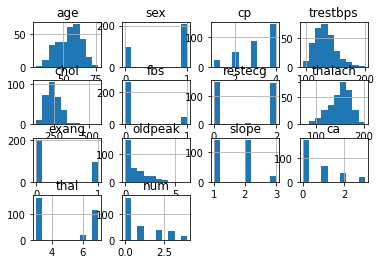

In [ ]:
dataset.hist()

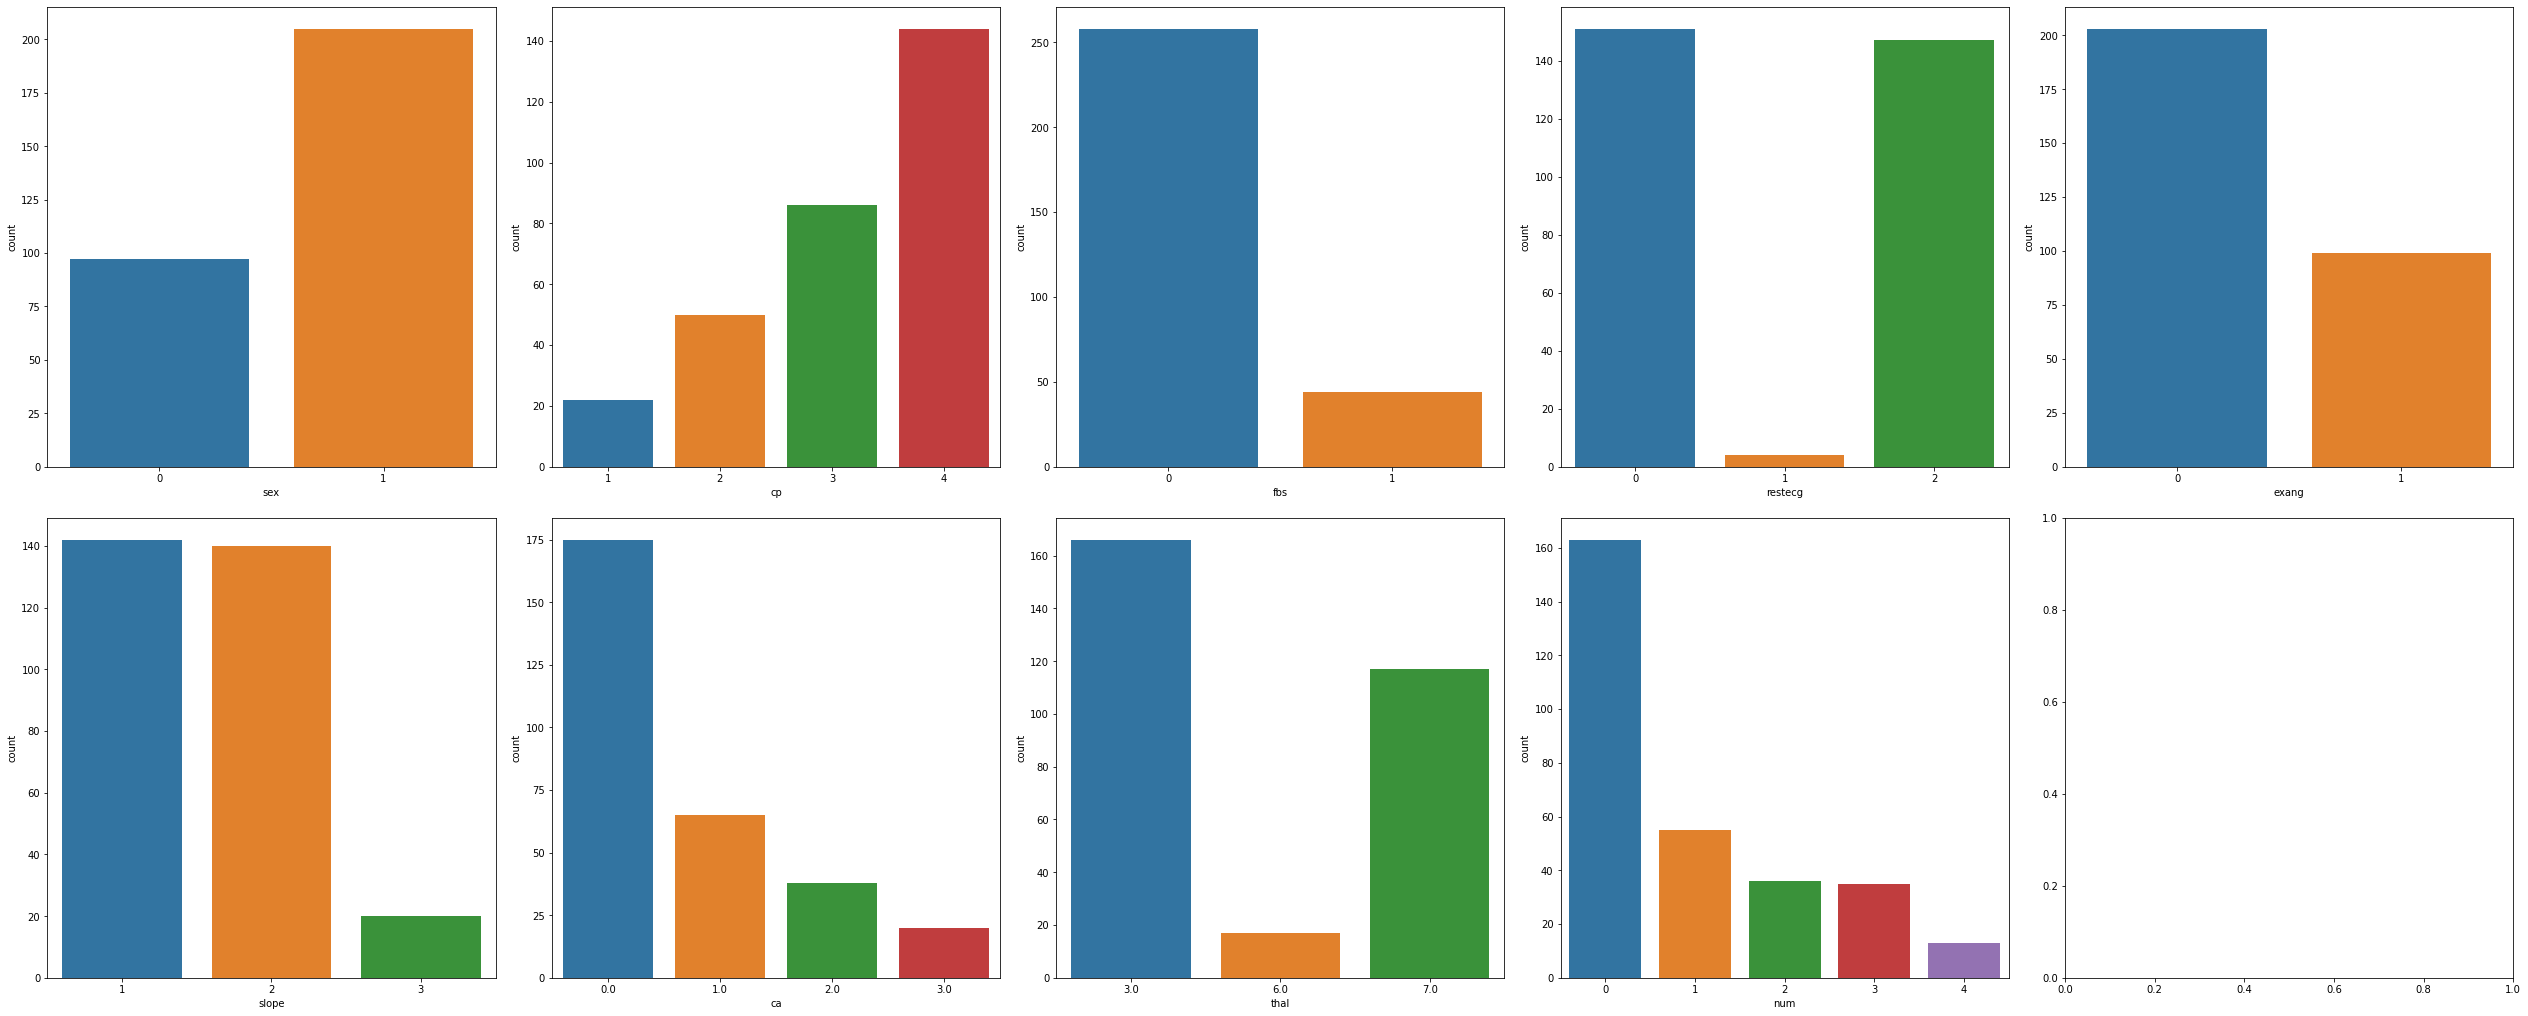

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_plots = len(cat_val)
total_cols = 5
total_rows = num_plots//total_cols + 1
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i,var in enumerate(cat_val):
     row = i//total_cols
     pos = i % total_cols
     plot = sns.countplot(x=var, data=dataset, ax=axs[row][pos])

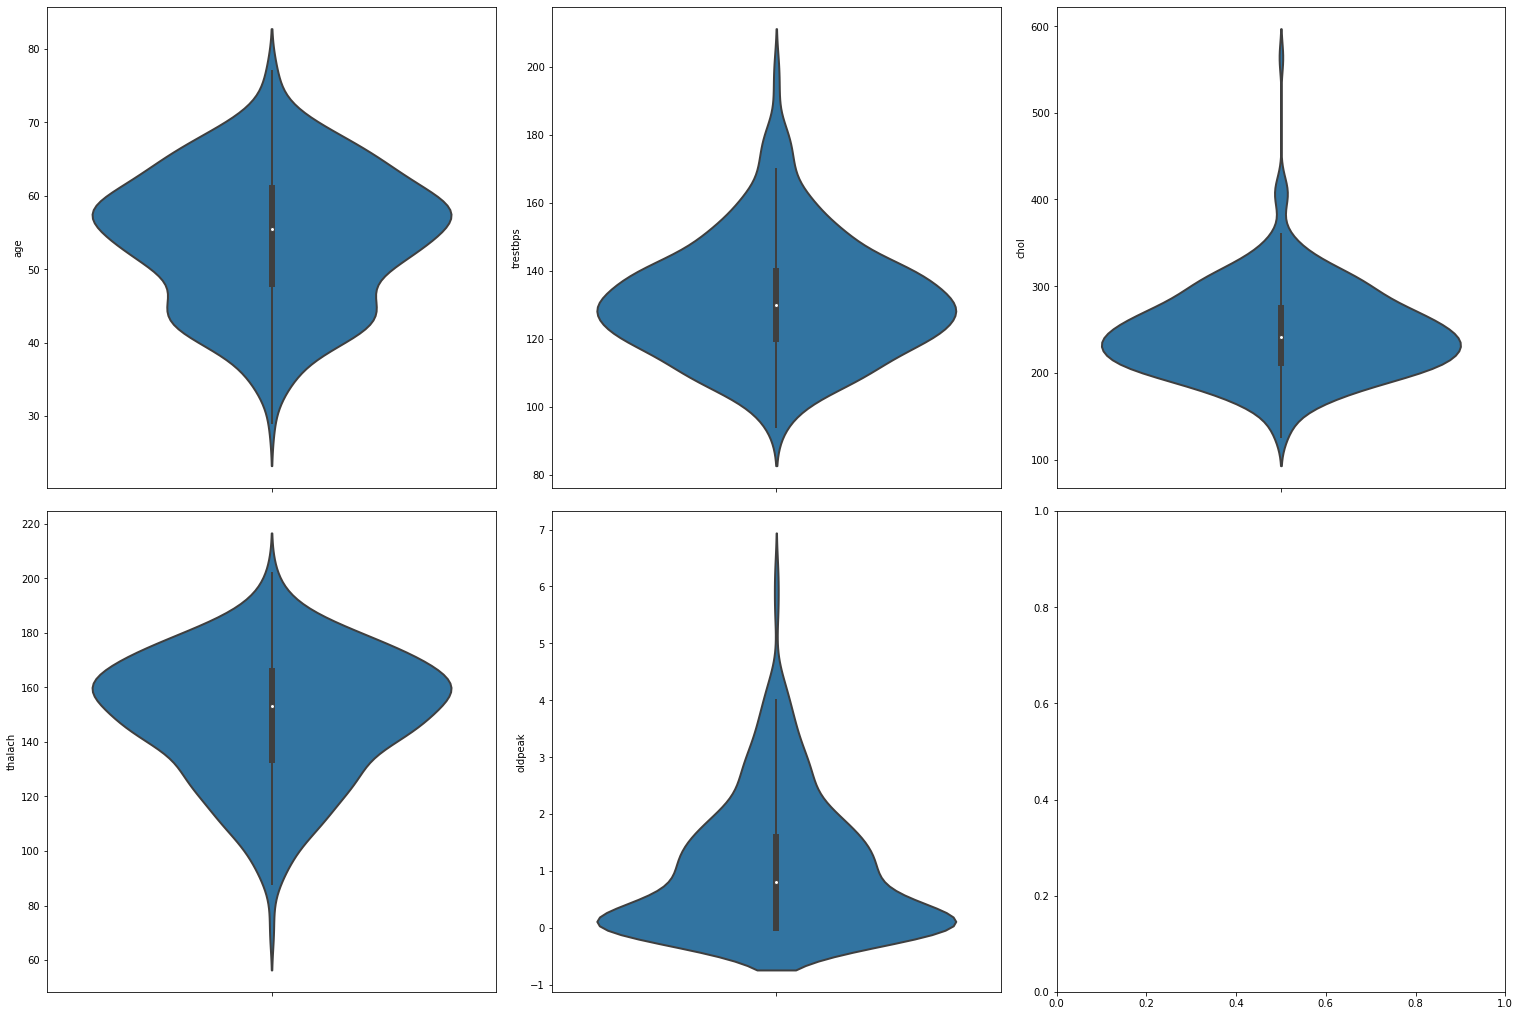

In [ ]:
num_plots = len(cont_val)
total_cols = 3
total_rows = num_plots//total_cols + 1
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(cont_val):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.violinplot(y=var, data=dataset, ax=axs[row][pos], linewidth=2)

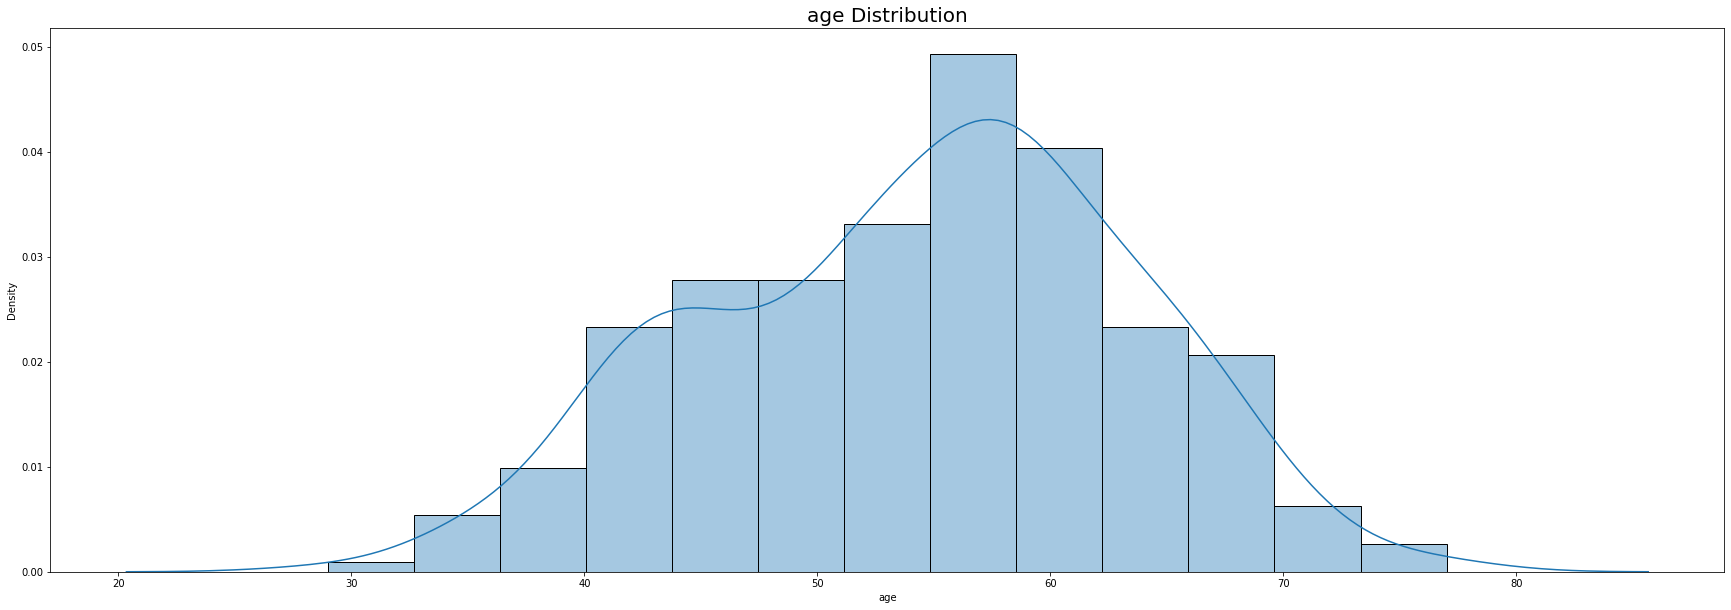

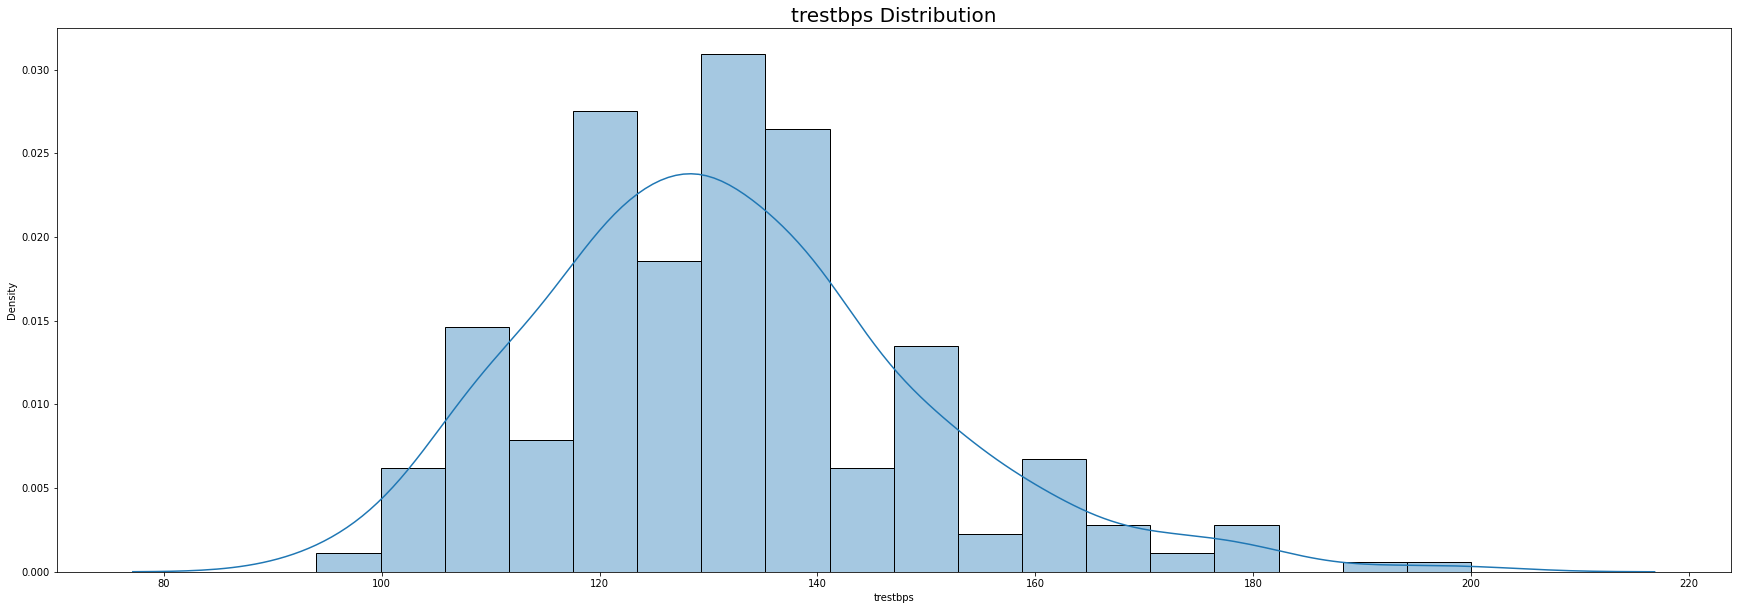

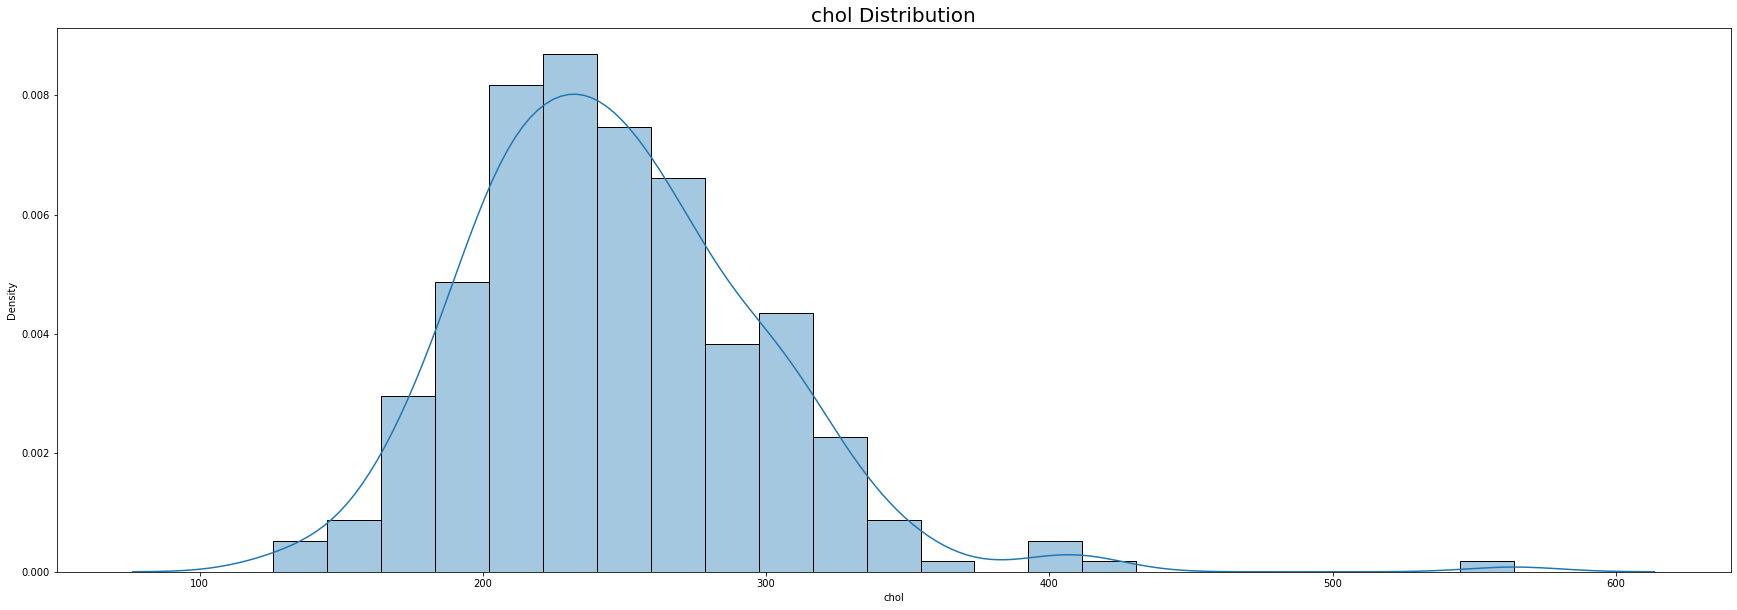

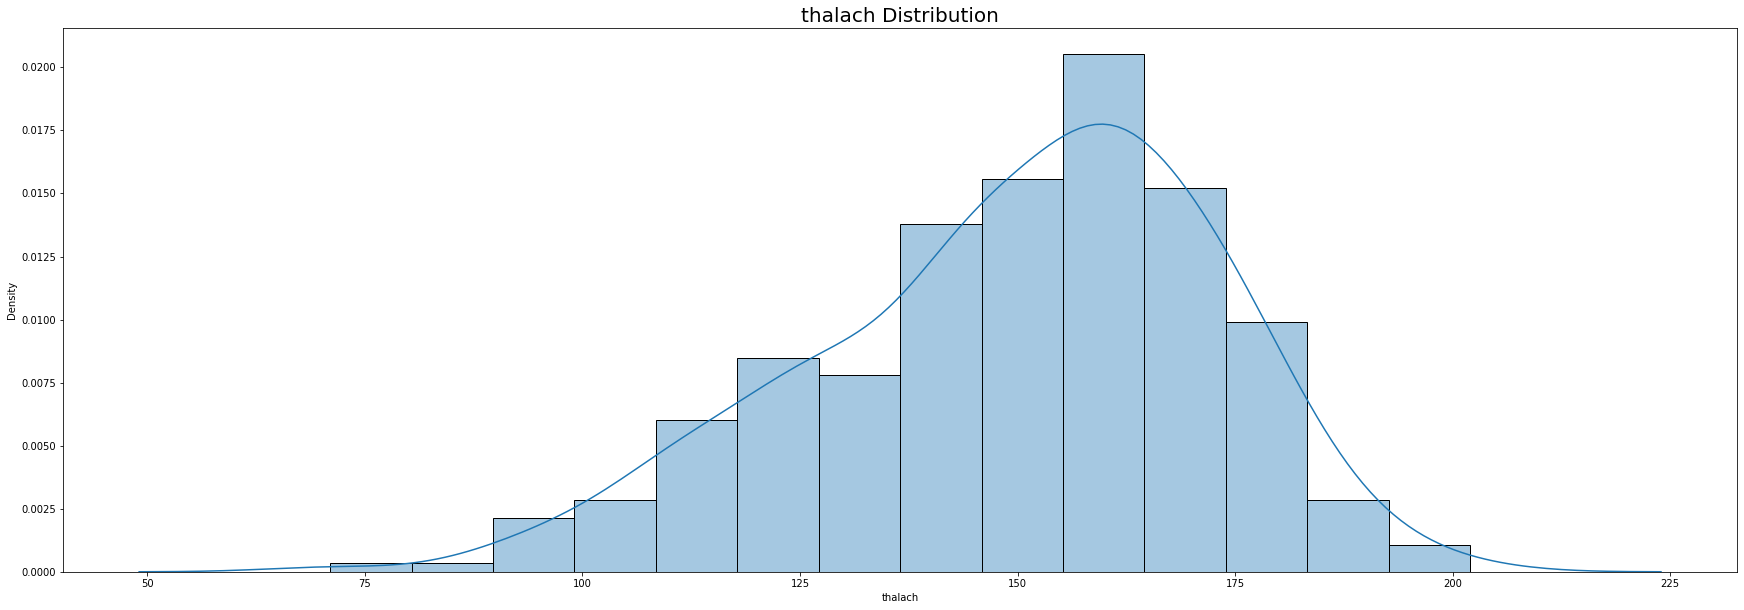

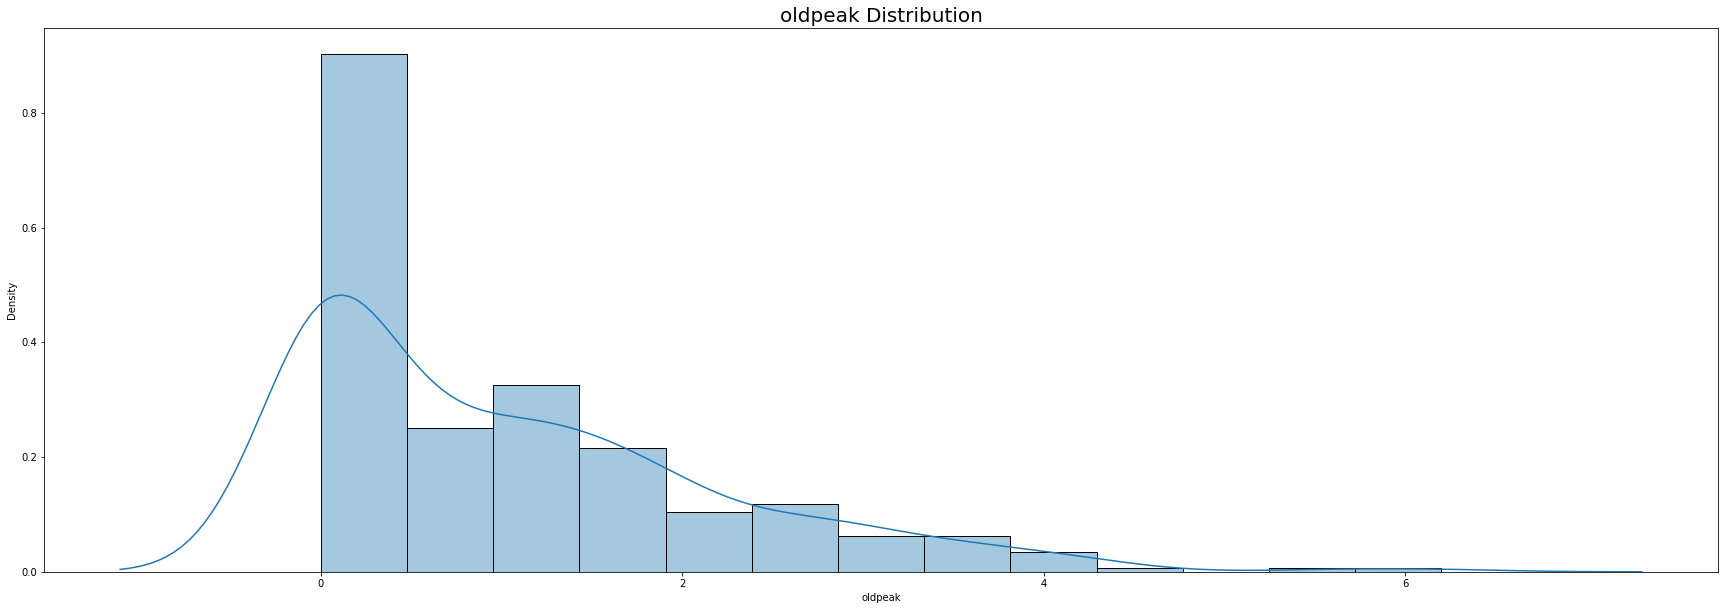

In [ ]:
for f in cont_val:
    plt.figure(figsize=(30, 10), facecolor='w')
    sns.histplot(data=dataset[f],stat="density", alpha=0.4, kde=True, kde_kws={"cut": 3})
    #sns.distplot(dataset[f])
    plt.title('{} Distribution'.format(f), fontsize=20)
    plt.show()

0 - absence of HD
1,2,3,4 - Severity of HD
0    163
1     55
2     36
3     35
4     13
Name: num, dtype: int64


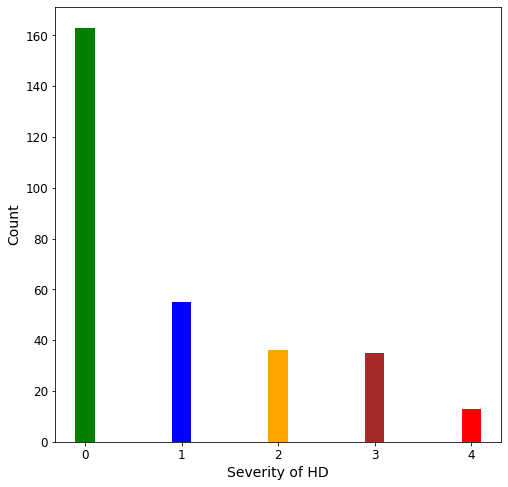

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from matplotlib.pyplot import rcParams
from google.colab import files

print("0 - absence of HD")
print("1,2,3,4 - Severity of HD")

print(dataset.num.value_counts())

# 0 - absence of HD
# 1 - presence of HD

hd = [0,1,2,3,4]
count = list(dataset['num'].value_counts())

rcParams['figure.figsize'] = 8,8
plt.bar(hd, dataset['num'].value_counts(), color = ['green','blue','orange','brown','red'],width=0.2)
plt.xticks([2,1,0,3,4])
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('Severity of HD', size = 14)
plt.ylabel('Count',size=14)
#plt.title('Count of each Target Class', size = 25)
plt.savefig('target-count.eps')
plt.show()
files.download('target-count.eps')

#Data Pre-proccessing

In [ ]:
#Checking missing values
print("Null values/missing values -")

dataset.isnull().values.any()

Null values/missing values -


True

In [ ]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [ ]:
dataset.isnull().sum() / dataset.shape[0] * 100

age         0.000000
sex         0.000000
cp          0.000000
trestbps    0.000000
chol        0.000000
fbs         0.000000
restecg     0.000000
thalach     0.000000
exang       0.000000
oldpeak     0.000000
slope       0.000000
ca          1.324503
thal        0.662252
num         0.000000
dtype: float64

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

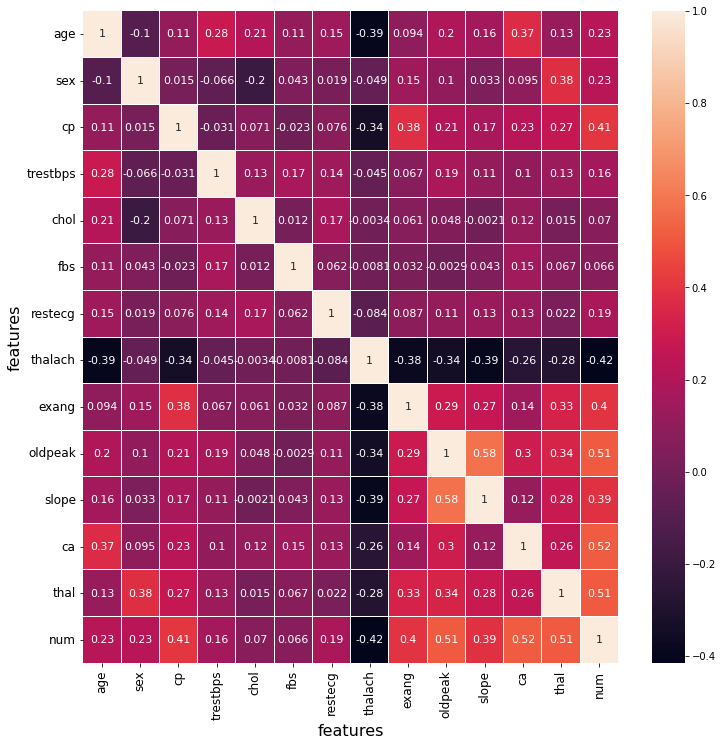

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

plt.figure(figsize=(12,12))
sns.heatmap(dataset.corr(),linewidth=.02,annot=True,annot_kws={'size': 11})
plt.xticks(rotation=90,size = 12)
plt.yticks(rotation=360,size = 12)
plt.xlabel('features', fontsize=16)
plt.ylabel('features', fontsize=16)
plt.savefig('correlationfigure.eps')
plt.show()
files.download('correlationfigure.eps')

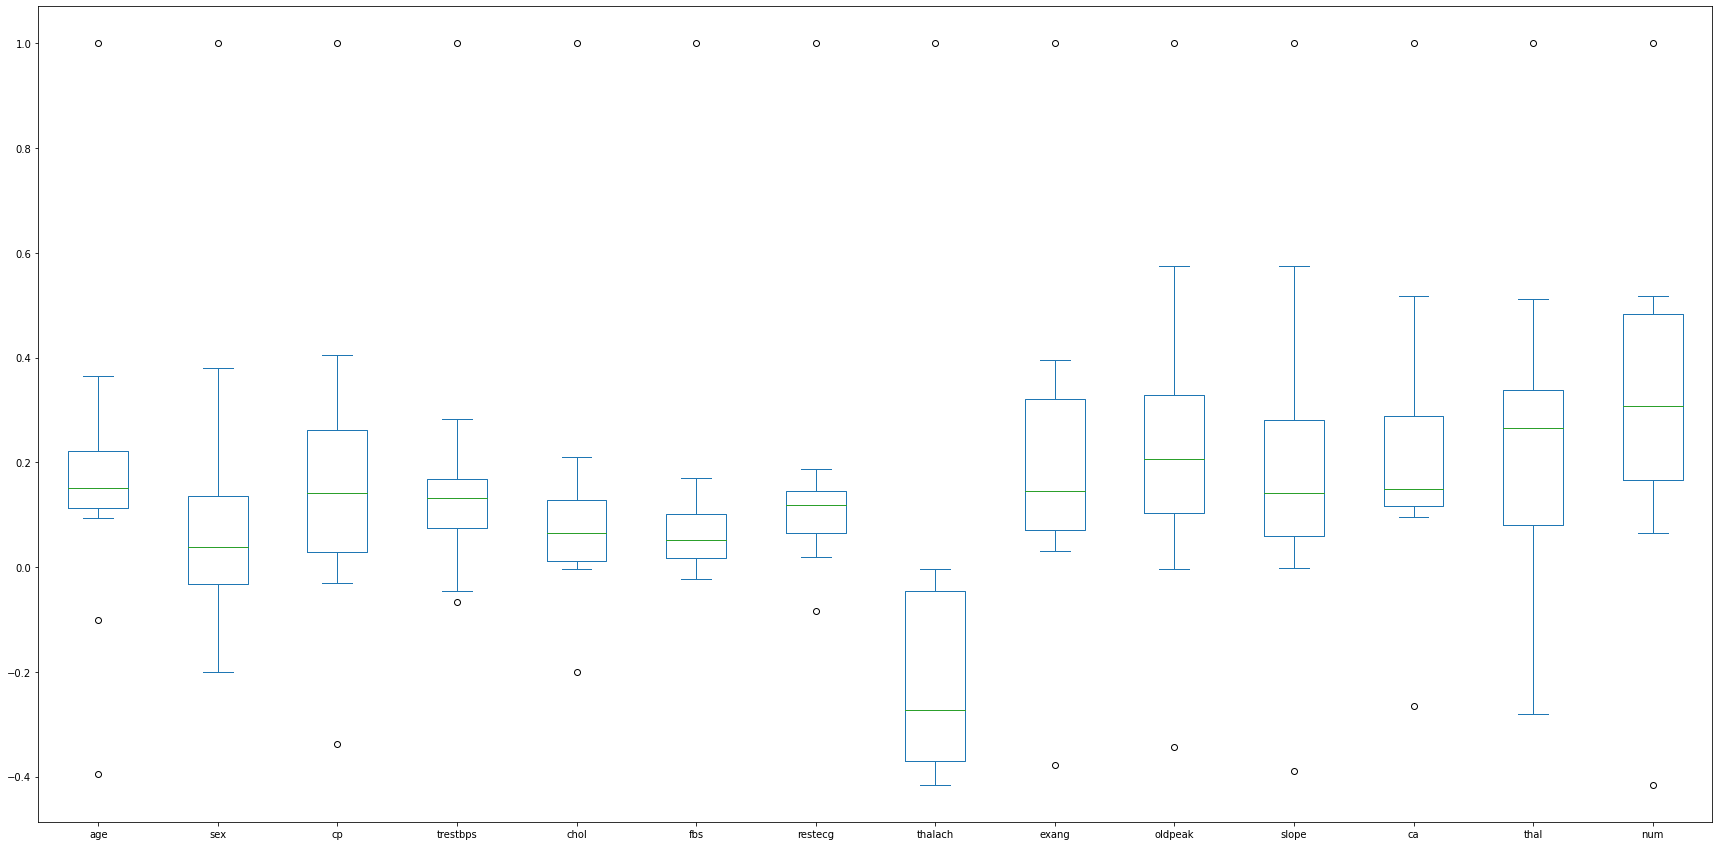

In [ ]:
dataset.corr().plot(kind="box",figsize=(30,15))

In [ ]:
print("correlations among attributes - closer to +/- 1 are more likely to be related")
print()
correlation=dataset.corr()
correlation

correlations among attributes - closer to +/- 1 are more likely to be related



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.099925,0.112326,0.283257,0.210120,0.112245,0.146142,-0.394448,0.094065,0.201083,0.156199,0.365732,0.125607,0.225809
sex,-0.099925,1.000000,0.015342,-0.066292,-0.199492,0.042863,0.019386,-0.048740,0.148019,0.099976,0.032671,0.095014,0.380012,0.226601
cp,0.112326,0.015342,1.000000,-0.030717,0.070950,-0.022524,0.075854,-0.337136,0.382394,0.212589,0.171926,0.229952,0.272629,0.405182
trestbps,0.283257,-0.066292,-0.030717,1.000000,0.130924,0.171127,0.144395,-0.045437,0.066627,0.186987,0.112752,0.100775,0.132131,0.159978
chol,0.210120,-0.199492,0.070950,0.130924,1.000000,0.012058,0.172249,-0.003417,0.060755,0.047617,-0.002085,0.118462,0.014813,0.070315
fbs,0.112245,0.042863,-0.022524,0.171127,0.012058,1.000000,0.062202,-0.008067,0.031514,-0.002907,0.042630,0.152906,0.066793,0.065937
restecg,0.146142,0.019386,0.075854,0.144395,0.172249,0.062202,1.000000,-0.083591,0.087432,0.110879,0.127603,0.131116,0.022370,0.186769
thalach,-0.394448,-0.048740,-0.337136,-0.045437,-0.003417,-0.008067,-0.083591,1.000000,-0.378368,-0.343821,-0.389078,-0.264423,-0.279859,-0.415399
exang,0.094065,0.148019,0.382394,0.066627,0.060755,0.031514,0.087432,-0.378368,1.000000,0.291536,0.265491,0.144129,0.331697,0.395996
oldpeak,0.201083,0.099976,0.212589,0.186987,0.047617,-0.002907,0.110879,-0.343821,0.291536,1.000000,0.575415,0.299260,0.339551,0.508330


In [ ]:
print("sorting the correlation among attributes corresponding with Target- ")

pd.DataFrame(correlation['num']).sort_values(by='num',ascending=False)

sorting the correlation among attributes corresponding with Target- 


,num
num,1.000000
ca,0.518018
thal,0.512448
oldpeak,0.508330
cp,0.405182
exang,0.395996
slope,0.387417
sex,0.226601
age,0.225809
restecg,0.186769


#filling missing values

In [ ]:
def impute_median(data):
    return data.fillna(data.median())

def impute_mode(data):
    return data.fillna(data.mode()[0])

In [ ]:
#cat-val (mode) - sex, cp, fbs, restecg, exang, slope, ca, thal, num
#cont-val (median) - age, trestbps, chol, thalach, oldpeak

#dataset.ca = dataset['ca'].transform(impute_mode)
#dataset.thal = dataset['thal'].transform(impute_mode)

def fill_categorical_missing(attributes):
  print("null values :",dataset.isnull().values.any())
  if dataset.isnull().values.any():
   for i in attributes:
    dataset[i] = dataset[i].transform(impute_mode)
  print("----------------------")
  print("filling missing values")
  print("----------------------")
  return dataset.isnull().values.any()

In [ ]:
attributes=['ca','thal']
fill_categorical_missing(attributes)

null values : True
----------------------
filling missing values
----------------------


False

In [ ]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1656x1080 with 0 Axes>

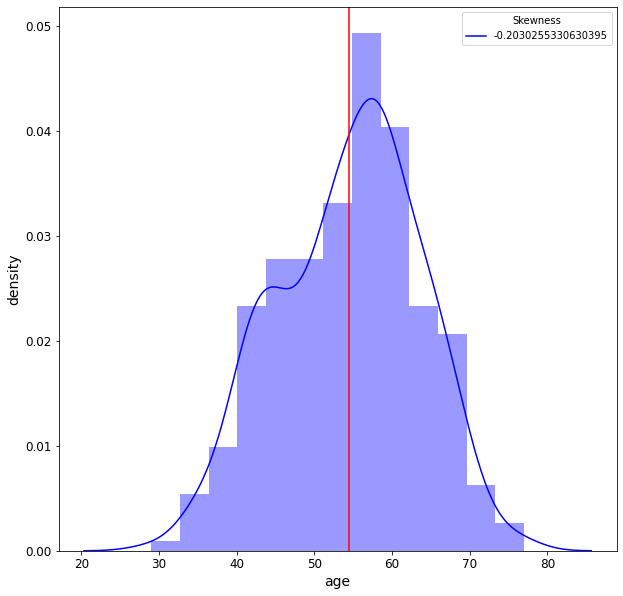

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


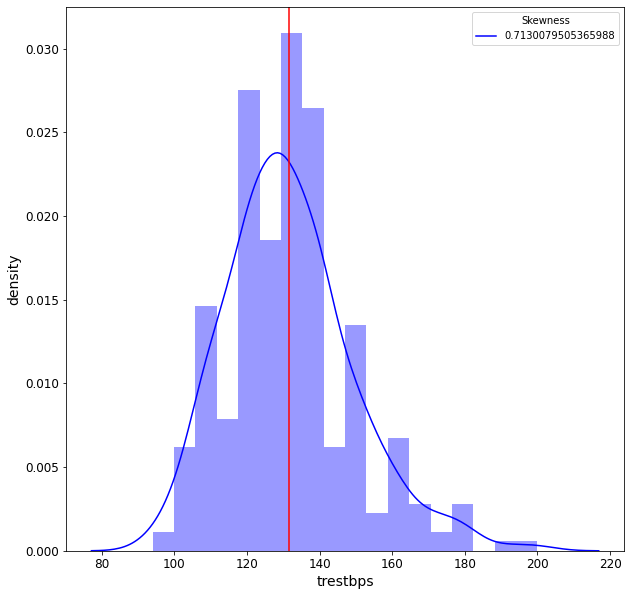

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


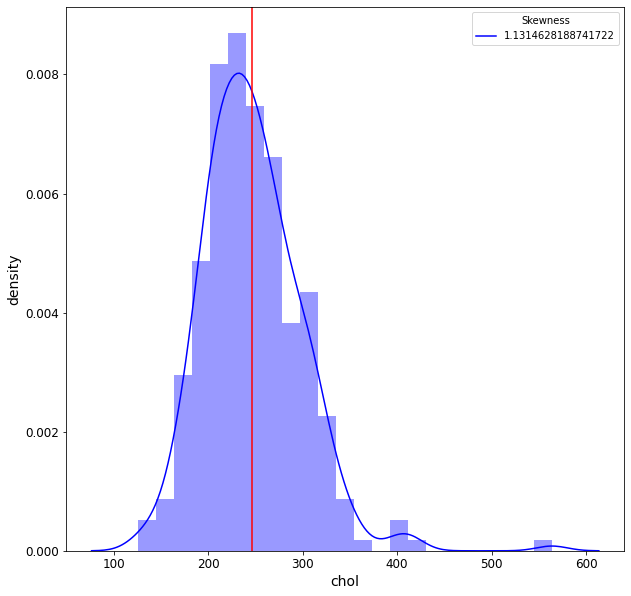

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


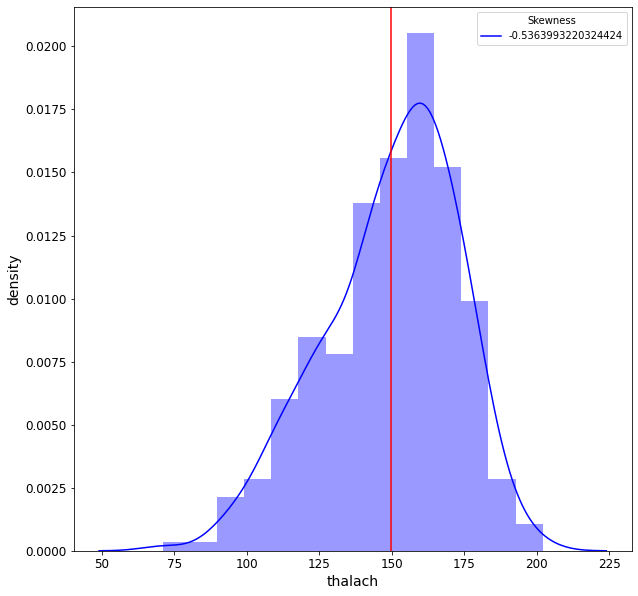

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


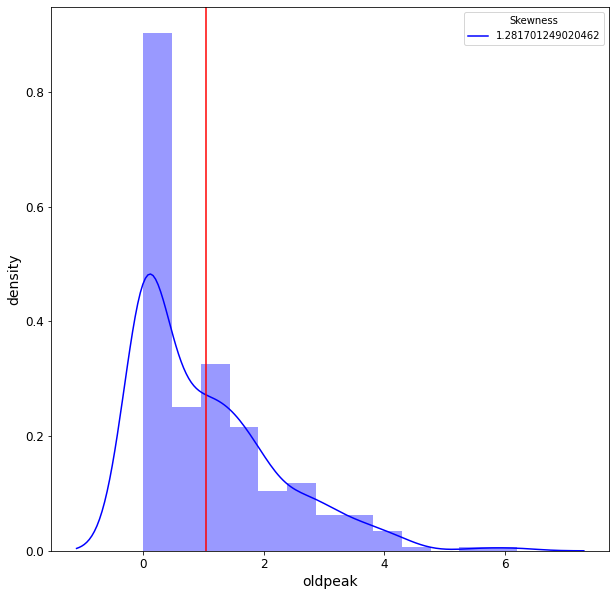

In [ ]:
plt.figure(figsize=(23,15))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

for i in cont_val:
  plt.figure(figsize=(10,10))
  plt.xticks(size = 12)
  plt.yticks(size = 12)
  plt.xlabel(i, fontsize=14)
  plt.ylabel('density', fontsize=14)
  sns.distplot(dataset[i] , color='blue')
  plt.axvline(np.mean(dataset[i]),color='r')
  plt.legend(labels=[dataset[i].skew()], title = "Skewness")
  plt.savefig('correlationfigure.eps')
  plt.show()

#Outlier Analysis

In [ ]:
from scipy import stats
import numpy as np

def Zscore(data,threshold):
 z = np.abs(stats.zscore(data))
 res = np.where(z > threshold)
 #print("Length:", len(res[0]), ":", len(res[1]))
 #print("Rows:",res[0])
 #print("Columns:",res[1])
 outliers_row = []
 for j in res[0]:
     r = []
     for i in data.columns:
        r.append(data[i][j])
     outliers_row.append(r)
 outliers_data = pd.DataFrame(data=outliers_row, columns = data.columns)
 return outliers_data

In [ ]:
Zscore(dataset,4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,62,0,4,160,164,0,2,145,0,6.2,3,3.0,7.0,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0.0,7.0,0


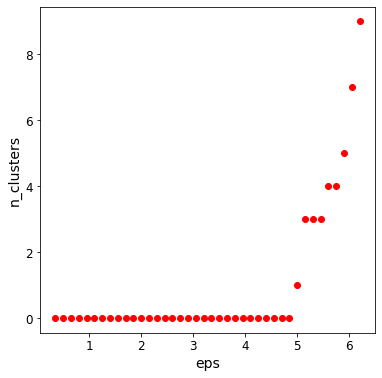

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.cluster import DBSCAN

X = dataset.drop(['num'], axis=1)

eps=0.2
for i in range(40):
    eps +=0.15
    model = DBSCAN(eps, min_samples=2).fit(X)
    labels = model.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    plt.figure(2, figsize=(6,6))
    plt.plot(eps,  n_clusters_,'-o', c='red')
    plt.ylabel('n_clusters', fontsize=14)
    plt.xlabel('eps',fontsize=14)
plt.xticks(size = 12)
plt.yticks(size = 12)    
plt.savefig('dbscan.eps')
plt.show()
files.download('dbscan.eps')

In [ ]:
from sklearn.cluster import DBSCAN
from collections import Counter

def findOutliers(X):
  model = DBSCAN(eps=5.0, min_samples=2).fit(X)
  labels=model.labels_
  count= Counter(model.labels_)
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  outliers = dataset[model.labels_ != -1];
  return outliers

In [ ]:
findOutliers(dataset.drop(['num'], axis=1))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
7,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2
53,60,1,4,130,253,0,0,144,1,1.4,1,1.0,7.0,1


#Treating Outliers

In [ ]:
print(dataset.shape)

#Z-score
dataset = dataset.drop([dataset.index[0], dataset.index[1]])

print(dataset.shape)

#DBSCAN
dataset = dataset.drop([dataset.index[7], dataset.index[53]])

print(dataset.shape)

(302, 14)
(300, 14)
(298, 14)


#Feature selection

In [ ]:
!pip install skfeature-chappers

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from skfeature.function.similarity_based import fisher_score

def featureSelection(X,y):
  best=SelectKBest(score_func=chi2, k=13)
  fit=best.fit(X,y)
  data_scores=pd.DataFrame(fit.scores_)
  data_columns=pd.DataFrame(X.columns)
  
  scores=pd.concat([data_columns,data_scores],axis=1)
  scores.columns=['Feature','Score']
  scores=scores.sort_values(by="Score", ascending=True)
  best_features_chisquared=scores["Feature"].tolist()[:13]

  #score = fisher_score.fisher_score(X,y)
  idx = fisher_score.fisher_score(X.to_numpy(),y.to_numpy(), mode='rank')
  #plotting the ranked_features
  f_ranks=pd.Series(idx,dataset.columns[0:len(dataset.columns)-1])

  result = [x * y for x, y in zip(list(idx), list(fit.scores_))]
  final_results=pd.DataFrame(result)
  feature_scores=pd.concat([data_columns,final_results],axis=1)
  feature_scores.columns=['Feature','Score']
  feature_scores=feature_scores.sort_values(by="Score", ascending=True)
  best_feature_scores=scores["Feature"].tolist()[:13]

  #print("chi squared scores :\n",scores)
  #print("fisher score ranks :\n",f_ranks)

  print("best features in ascending order :\n")

  return  best_feature_scores

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 66 kB 2.4 MB/s 


In [ ]:
X = dataset.drop('num',axis=1)
y = dataset.num

featureSelection(X,y)

best features in ascending order :



['fbs',
 'sex',
 'slope',
 'restecg',
 'cp',
 'trestbps',
 'age',
 'chol',
 'exang',
 'thal',
 'oldpeak',
 'ca',
 'thalach']

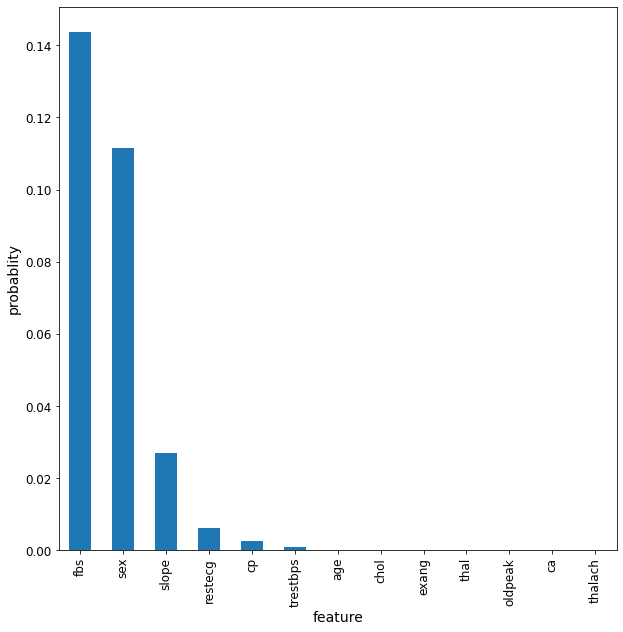

In [ ]:
from sklearn.feature_selection import chi2

X = dataset.drop('num',axis=1)
y = dataset['num']

chi_scores = chi2(X,y)

p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

plt.figure(figsize=(10,10), facecolor='w')
p_values.plot.bar()
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('feature', fontsize=14)
plt.ylabel('probablity', fontsize=14)
plt.savefig('chisquare_prob.eps')
plt.show()
#files.download('chisquare_prob.eps')

In [ ]:
best=SelectKBest(score_func=chi2, k=10)
fit=best.fit(X,y)
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(X.columns)

scores=pd.concat([data_columns,data_scores],axis=1)
scores.columns=['Feature','Score']
print(scores.nlargest(11,'Score'))

     Feature       Score
7    thalach  210.092305
11        ca  106.598056
9    oldpeak  103.643756
12      thal   72.215115
8      exang   40.070394
4       chol   33.076997
0        age   27.209904
3   trestbps   19.000797
2         cp   16.403080
6    restecg   14.405333
10     slope   10.969071


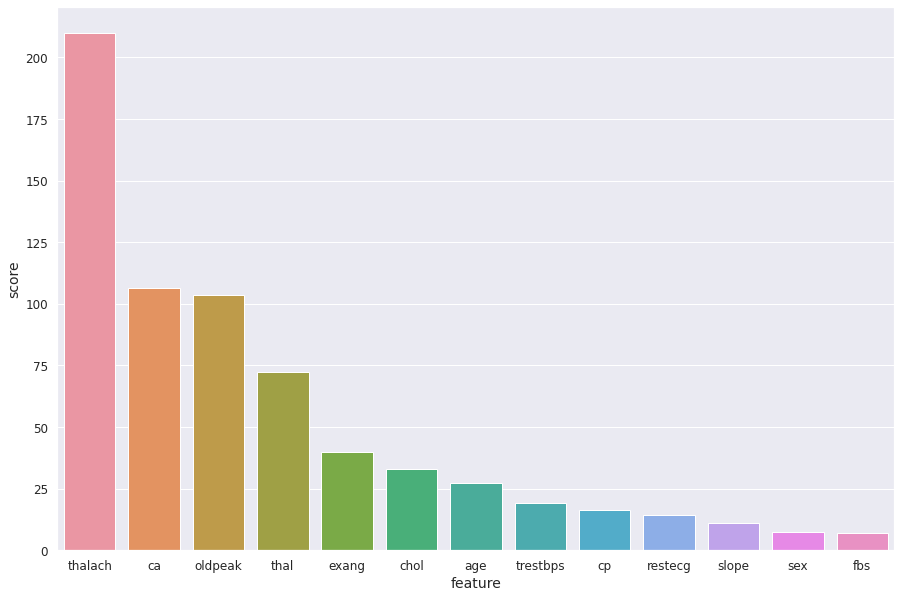

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
scores=scores.sort_values(by="Score", ascending=False)
plt.figure(figsize=(15,10), facecolor='w')
sns.set(font_scale = 2)
sns.barplot(x='Feature',y='Score',data=scores)
#plt.title("The best - 10 features in Ascending order", size=20)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('feature', fontsize=14)
plt.ylabel('score', fontsize=14)
plt.savefig('chisquare_score.eps')
plt.show()
files.download('chisquare_score.eps')

In [ ]:
best_features_chisquared=scores["Feature"].tolist()[:10]
best_features_chisquared

['thalach',
 'ca',
 'oldpeak',
 'thal',
 'exang',
 'chol',
 'age',
 'trestbps',
 'cp',
 'restecg']

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


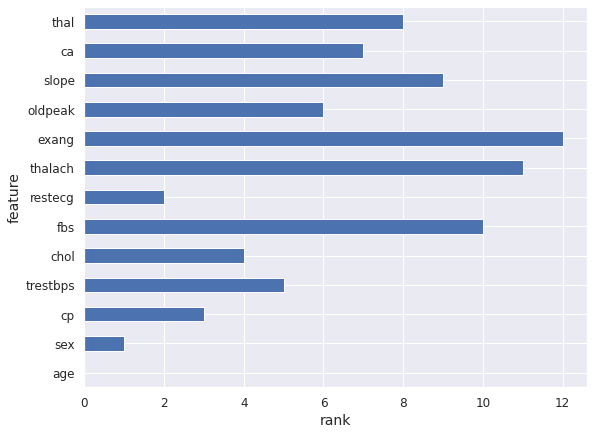

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install skfeature-chappers
from skfeature.function.similarity_based import fisher_score

dataset.reset_index(drop=True, inplace=True)

X = dataset.drop('num',axis=1)
y = dataset.num

#idx = fisher_score.fisher_score(X.to_numpy(),y.to_numpy(), mode='rank')
idx = fisher_score.fisher_score(X.to_numpy(),y.to_numpy())

#plotting the ranked_features
f_ranks=pd.Series(idx,dataset.columns[0:len(dataset.columns)-1])
plt.figure(figsize=(9,7))
f_ranks.plot(kind='barh')
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('rank', fontsize=14)
plt.ylabel('feature', fontsize=14)
plt.savefig('fisher_score.eps')
plt.show()
files.download('fisher_score.eps')

In [ ]:
!pip install skfeature-chappers
from skfeature.function.similarity_based import fisher_score

dataset.reset_index(drop=True, inplace=True)

X = dataset.drop('num',axis=1)
y = dataset.num

idx = fisher_score.fisher_score(X.to_numpy(),y.to_numpy(), mode='rank')
#print(idx)
#print(dataset.columns[0:len(dataset.columns)-1])

#plotting the ranked_features
f_ranks=pd.DataFrame(dataset.columns[0:len(dataset.columns)-1])
f_ranks.columns=['feature']
f_ranks['fs_ranks']=idx
print(f_ranks.head(15))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     feature  fs_ranks
0        age         0
1        sex         1
2         cp         3
3   trestbps         5
4       chol         4
5        fbs        10
6    restecg         2
7    thalach        11
8      exang        12
9    oldpeak         6
10     slope         9
11        ca         7
12      thal         8


In [ ]:
best=SelectKBest(score_func=chi2, k=10)
fit=best.fit(X,y)
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(dataset.columns[0:len(dataset.columns)-1])

scores=pd.concat([data_columns,data_scores],axis=1)
scores.columns=['feature','score']
chi_ranks=[]
for i in range(1,len(X.columns)+1):
  chi_ranks.append(i)
#print(chi_ranks)
scores=scores.nlargest(13,'score')
scores['chi_sq']=chi_ranks
#print(scores.head(15))
scores=scores.sort_index(ascending=True)
print(scores.head(15))

     feature       score  chi_sq
0        age   27.209904       7
1        sex    7.505106      12
2         cp   16.403080       9
3   trestbps   19.000797       8
4       chol   33.076997       6
5        fbs    6.858585      13
6    restecg   14.405333      10
7    thalach  210.092305       1
8      exang   40.070394       5
9    oldpeak  103.643756       3
10     slope   10.969071      11
11        ca  106.598056       2
12      thal   72.215115       4


In [ ]:
feature_selection = pd.DataFrame(dataset.columns[0:len(dataset.columns)-1])
feature_selection.columns=['feature']
feature_selection['chi_sq_score']=data_scores
feature_selection['chi_rank']=scores['chi_sq']

fs_ranks=[]
for i in idx:
  i=i+1
  fs_ranks.append(i)
#print(fs_ranks)

feature_selection['fs_ranks']=fs_ranks
#print(len(chi_ranks))
#print(len(fs_ranks))

chisq_rank=np.array(scores['chi_sq'].sort_index(ascending=True))
#print(chisq_rank)

final_score = [chisq_rank[i] * fs_ranks[i] for i in range(len(chisq_rank))]
#print(final_score)

feature_selection['multi_score']= final_score
#print(feature_selection.head(15))

#print(feature_selection.nsmallest(13,'multi_rank'))
#print(pd.DataFrame(correlation['target']).sort_values(by='target',ascending=False))

feature_selection=feature_selection.nsmallest(13,'multi_score')
feature_selection['final_rank']= chi_ranks

ordered=feature_selection.sort_index(ascending=True)

print(ordered.head(15))
print(feature_selection.head(15))

     feature  chi_sq_score  chi_rank  fs_ranks  multi_score  final_rank
0        age     27.209904         7         1            7           1
1        sex      7.505106        12         2           24           5
2         cp     16.403080         9         4           36           8
3   trestbps     19.000797         8         6           48          10
4       chol     33.076997         6         5           30           6
5        fbs      6.858585        13        11          143          13
6    restecg     14.405333        10         3           30           7
7    thalach    210.092305         1        12           12           2
8      exang     40.070394         5        13           65          11
9    oldpeak    103.643756         3         7           21           4
10     slope     10.969071        11        10          110          12
11        ca    106.598056         2         8           16           3
12      thal     72.215115         4         9           36     

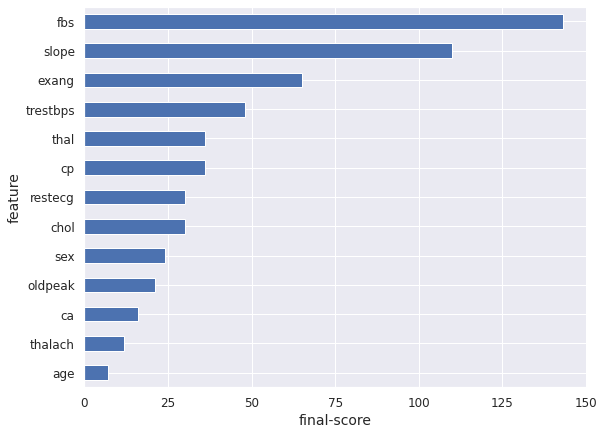

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
final_scores=pd.Series(np.array(feature_selection['multi_score']),np.array(feature_selection['feature']))
plt.figure(figsize=(9,7))
final_scores.plot(kind='barh')
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('final-score', fontsize=14)
plt.ylabel('feature', fontsize=14)
plt.savefig('final_scores.eps')
plt.show()
files.download('final_scores.eps')

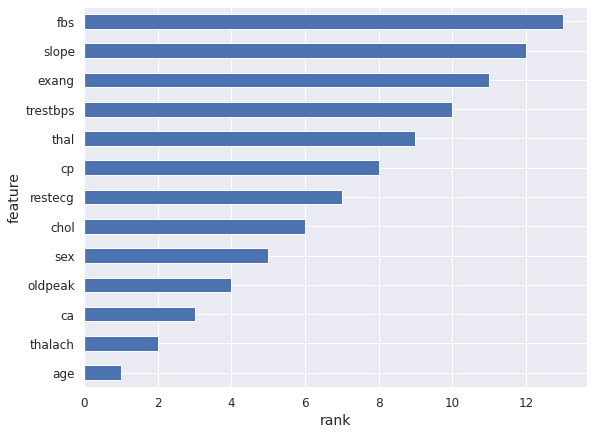

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
final_ranks=pd.Series(np.array(feature_selection['final_rank']),np.array(feature_selection['feature']))
plt.figure(figsize=(9,7))
final_ranks.plot(kind='barh')
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('rank', fontsize=14)
plt.ylabel('feature', fontsize=14)
plt.savefig('final_ranks.eps')
plt.show()
files.download('final_ranks.eps')

In [ ]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

scaler = preprocessing.StandardScaler()

final_dataset = dataset[['age','thalach','ca','oldpeak']]
#final_dataset = dataset[['age','thalach','ca','oldpeak','sex']]
scaler.fit(final_dataset)
final_X_scaled_array = scaler.transform(final_dataset)
final_X_scaled = pd.DataFrame(final_X_scaled_array, columns = final_dataset.columns)

ndimensions = 2
#ndimensions = 5

pca = PCA(n_components=ndimensions, random_state=0)
pca.fit(final_X_scaled)
final_X_pca_array = pca.transform(final_X_scaled)
final_X_pca = pd.DataFrame(final_X_pca_array, columns=['PC1','PC2'])
#final_X_pca = pd.DataFrame(final_X_pca_array, columns=['PC1','PC2','PC3','PC4','PC5'])
final_X_pca.head(10)

,PC1,PC2
0,-1.202699,2.817378
1,-1.471241,1.193299
2,-0.996177,-0.225503
3,1.949595,0.914906
4,-0.675262,-0.380747
5,0.888729,-0.390249
6,0.280849,1.579435
7,-0.222732,0.183378
8,0.285500,-0.442760
9,-1.883636,0.055362


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate,GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold,LeaveOneOut
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture
import pandas as pd

#EM Clustering and SVM

In [ ]:
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

scale = MinMaxScaler()
X1 = dataset[['age','thalach','ca','oldpeak']]
y = dataset['num']
x = scale.fit_transform(X1)

colors = ['royalblue','red']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

seed=0

GMM = GaussianMixture(n_components = 5, random_state=seed)
res_GMM = GMM.fit(X1)

weights_GMM = GMM.weights_
print("Weights:",weights_GMM)

means_GMM = GMM.means_
print("Means:",means_GMM)

covariance_GMM = GMM.covariances_
print("Type of covariance_GMM:",type(covariance_GMM))

covariance_GMM.size

y = res_GMM.predict(X1)
print(y)

#plt.scatter(x[:,0], x[:,1],c=vectorizer(y))

#plt.scatter(x[:,0], x[:,1],c=vectorizer(y))

#splitting the data into train and test
x_train,x_test,y_train,y_test = train_test_split(X1,y,test_size=0.3,random_state=65)

grd1 = GridSearchCV(estimator = SVC(kernel='rbf'),
                  param_grid = {
                      'C' :   [0.1,0.01,0.001,1,10,100,1000],
                      'degree' : [1,2,3,4],
                      'coef0' : [0.001,0.0001],
                      'gamma':['scale','auto']
                  }, cv=3,scoring='accuracy',verbose=0,n_jobs=-1)

#fitting into the grid
grid1 = grd1.fit(x_train,y_train)

best_parameters = grid1.best_params_
print("The best paramters for SVM are : \n",best_parameters)

best_model1 = SVC(kernel='rbf', C=best_parameters["C"], gamma=best_parameters["gamma"], coef0=best_parameters["coef0"], shrinking=True,
                   tol=0.001, cache_size=200, verbose=False, max_iter=-1,  probability=True).fit(x_train,y_train)

#scoring = {'accuracy_score': 'accuracy','log_loss_score': 'neg_log_loss'}

#scores = cross_validate(best_model1, final_X_pca, y, cv=3, scoring=scoring, return_train_score = True)

print()
#print("Testing accuracy is: ",scores['test_accuracy_score'].mean())

kf =KFold(n_splits=3, shuffle=True, random_state=2)
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=2)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

print()

#K-fold
print("Processing K-fold CV !!!")
score = cross_val_score(best_model1, final_X_pca, y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score}')
rmse(score.mean())
print()

#Stratified K-fold
print()
print("Processing Stratified K-fold CV !!!")
score = cross_val_score(best_model1, final_X_pca, y, cv= skf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score}')
rmse(score.mean())

print()
y_pred_svm =best_model1.predict(x_test)
print("Accuracy is :",accuracy_score(y_test,y_pred_svm))

print()
print("no.of predictions made are \n",y_pred_svm.shape)
print()

cm_svm = confusion_matrix(y_test, y_pred_svm)
print()
print("Confusion matrix for the model is shown below \n")
print(cm_svm)

Weights: [0.07893231 0.5972662  0.08512866 0.17760218 0.06107064]
Means: [[ 57.73709494 108.13158408   1.39383457   1.64036108]
 [ 51.51091236 155.14230987   0.           0.81012235]
 [ 57.87793109 143.51055156   1.88554419   2.43224971]
 [ 57.81639437 161.08904874   1.46598391   0.62888936]
 [ 62.44861071 126.9383389    2.02172482   1.6396141 ]]
Type of covariance_GMM: <class 'numpy.ndarray'>
[1 1 1 2 1 3 1 1 2 1 1 1 1 1 1 1 1 1 1 3 4 1 1 1 1 1 3 3 1 1 1 1 1 0 2 1 4
 1 3 1 1 3 1 1 3 1 3 1 3 1 2 0 1 3 0 1 1 4 1 0 2 1 1 1 1 1 3 0 3 3 1 2 3 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 3 2 2 3 1 1 1 3 4 2 1 3 3 2 1 1 2 1 1 0 1
 1 1 4 4 2 2 1 1 3 1 4 0 1 1 1 3 1 1 1 1 1 0 1 1 1 1 1 1 1 1 4 1 1 3 1 1 1
 3 0 0 1 3 3 3 1 3 1 1 3 1 1 3 1 1 0 1 1 1 4 0 2 0 3 3 1 2 3 1 1 3 1 4 3 3
 1 4 1 0 1 4 4 1 1 1 1 1 3 1 1 2 4 1 1 1 1 1 1 3 3 1 1 1 4 1 1 1 1 0 3 1 1
 3 0 4 1 1 4 4 3 0 1 1 1 1 1 1 1 2 1 1 3 0 3 1 1 0 0 1 1 1 3 1 1 1 3 3 1 1
 4 1 1 2 1 1 2 1 0 1 3 1 3 1 3 1 2 1 2 1 3 2 2 1 1 1 1 1 1 2 1 1 0 1 1 2 0
 3 

In [ ]:
from sklearn.metrics import classification_report
target_names = ['0','1','2','3','4']
print(classification_report(y_test,y_pred_svm, target_names=target_names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        54
           2       1.00      0.89      0.94         9
           3       0.92      1.00      0.96        12
           4       1.00      1.00      1.00         6

    accuracy                           0.99        90
   macro avg       0.98      0.98      0.98        90
weighted avg       0.99      0.99      0.99        90



In [ ]:
from sklearn.decomposition import PCA
 
pca = PCA(3)
pca.fit(dataset[['age','thalach','ca','oldpeak']])
 
pca_data = pd.DataFrame(pca.transform(dataset[['age','thalach','ca','oldpeak']]))
 
print(pca_data.head())

           0          1         2
0 -39.613293 -10.628796  3.043923
1 -24.187651  -9.299246  0.753508
2 -27.519050   6.500692 -0.015683
3  -8.687536   9.375262  2.892137
4 -12.578070   4.890074 -0.473664


In [ ]:
from matplotlib import colors as mcolors
import math
  
colors = list(zip(*sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                     for name, color in dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).items())))[1]
  
clusters=5

# number of steps to taken generate n(clusters) colors
skips = math.floor(len(colors[5 : -1])/clusters)
cluster_colors = colors[5 : -3 : skips]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerPatch
colors = ["grey","saddlebrown", "olive","lightcyan","darkblue"]
texts = ["0","1", "2","3","4"]
class HandlerEllipse(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        center = 0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent
        p = mpatches.Ellipse(xy=center, width=height + xdescent,
                             height=height + ydescent)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]

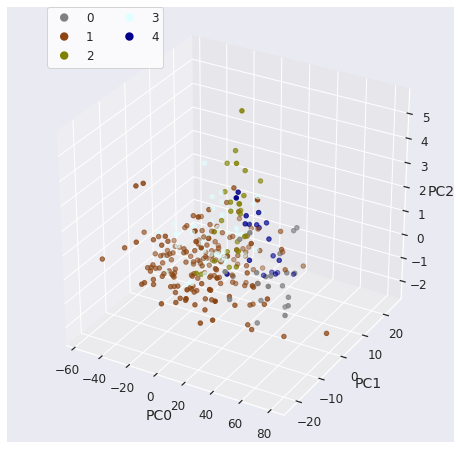

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pylab as plot

params = {'legend.fontsize': 12,
          'legend.handlelength': 2}
plot.rcParams.update(params)

colors1 = list(map(lambda label : cluster_colors[label],y))

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.set_xlabel('PC0', fontsize=14, rotation = 0)
ax.set_ylabel('PC1', fontsize=14, rotation = 0)
ax.set_zlabel('PC2', fontsize=14, rotation = 0)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.zaxis.set_tick_params(labelsize=12)
ax.scatter(pca_data[0], pca_data[1], pca_data[2],c=colors1)
#ax.scatter(pca_data[0], pca_data[1], pca_data[2],s=50, color=colors1, alpha=0.7)
ax.legend()

str_labels = list(map(lambda label:'% s' % label, y))
#print(y)
#print(cluster_colors)
#print(colors1)

c = [ mpatches.Circle((0.2, 0.2), radius = 0.15, facecolor=colors[i], edgecolor="none" ) for i in range(len(texts))]
plt.legend(c,texts,bbox_to_anchor=(0.35, 1.0), loc='best', borderaxespad=0, ncol=2, handler_map={mpatches.Circle: HandlerEllipse()}).get_frame().set_facecolor('white')

#list(map(lambda data1, data2, data3, str_label: ax.text(data1, data2, data3, s = str_label, size = 16.5,zorder = 20, color = 'k'), pca_data[0], pca_data[1],pca_data[2], str_labels))
plt.savefig('EM clustering.eps')
plt.show()
files.download('EM clustering.eps')

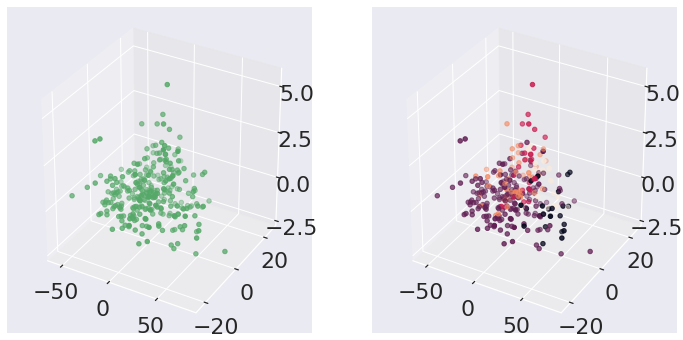

In [ ]:
cList = np.unique(y)
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
ax1.scatter(pca_data[0], pca_data[1], pca_data[2], color='g')
ax2.scatter(pca_data[0], pca_data[1], pca_data[2], c=y)
plt.show()

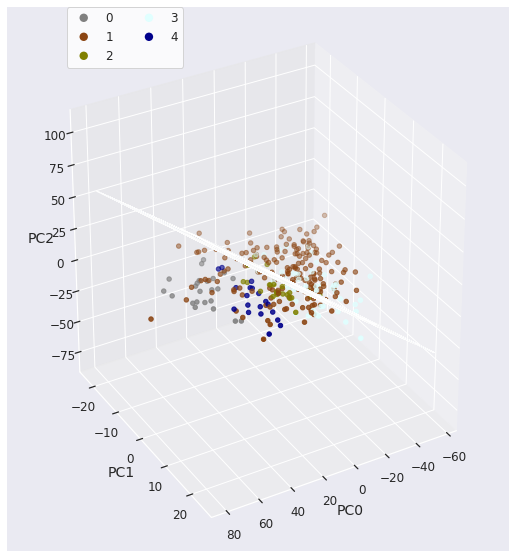

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def get_area(x, y):
    return x+y

x = np.array(pca_data[0])
y = np.array(pca_data[1])
X, Y = np.meshgrid(x, y)
Z = get_area(X, Y)

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('PC0', fontsize=14, rotation = 0)
ax.set_ylabel('PC1', fontsize=14, rotation = 0)
ax.set_zlabel('PC2', fontsize=14, rotation = 0)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.zaxis.set_tick_params(labelsize=12)
ax.scatter(pca_data[0], pca_data[1], pca_data[2],c=colors1)
ax.plot_surface(X, Y, Z,rstride=1,cstride=1)
ax.view_init(30, 60)
pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
c = [ mpatches.Circle((0.2, 0.2), radius = 0.15, facecolor=colors[i], edgecolor="none" ) for i in range(len(texts))]
plt.legend(c,texts,bbox_to_anchor=(0.35, 1.0), loc='best', borderaxespad=0, ncol=2, handler_map={mpatches.Circle: HandlerEllipse()}).get_frame().set_facecolor('white')
plt.savefig('svm.eps')
plt.show()
files.download('svm.eps')

In [ ]:
!pip install -U kaleido
!conda install -c plotly plotly-orca
import plotly.graph_objects as go
import plotly
import plotly.io as pio

Z = lambda X,Y: (-best_model1.intercept_[0]-best_model1.coef_[0][0]*X-best_model1.coef_[0][1]*Y) / best_model1.coef_[0][2]

trace1 = go.Mesh3d(x = pca_data[0], y = pca_data[1], z = Z(pca_data[0],pca_data[1])) 
trace2 = go.Scatter3d(x=pca_data[0], y=pca_data[1],z=pca_data[2],mode='markers',marker = dict(size = 3,color = colors1))
data=[trace1,trace2]
fig = go.Figure(data=data)
fig.update_layout(legend=dict(title="Class"))
#fig.update_layout(showlegend=True)
fig.update_layout(font=dict(family="Times New Roman",size=12,color="RebeccaPurple"))
fig.update_layout(scene = dict(
                    xaxis_title='PC0',
                    yaxis_title='PC1',
                    zaxis_title='PC2'))
fig.show()
#fig.to_image(format="eps", engine="kaleido")
fig.write_image("/content/gdrive/My Drive/svm1.eps")
#pio.write_image(fig, "svm1.png", engine='kaleido')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/bin/bash: conda: command not found


AttributeError: ignored

In [ ]:
import os

if not os.path.exists("images"):
    os.mkdir("images")

In [ ]:
fig.write_image("images/svm1.png",engine="kaleido")